# Data Description and Explooration

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict, KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report, f1_score, recall_score, roc_auc_score
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from tensorflow.keras.layers import Dense, BatchNormalization
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow import keras
from sklearn import metrics
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import math

drive.mount('/content/drive', force_remount=True)
file_path = '/content/drive/MyDrive/Deep_Neural_Network_and_Learning_Systems/Dataset/creditcard.csv'

df = pd.read_csv(file_path)
df.head(5)

Mounted at /content/drive


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#Check for missing values
df.isnull().values.any()

False

In [ ]:
# Checking value count for transaction classes
df.value_counts(df['Class'], sort=True)

Class
0    284315
1       492
dtype: int64

Text(0, 0.5, 'Frequency of Transaction')

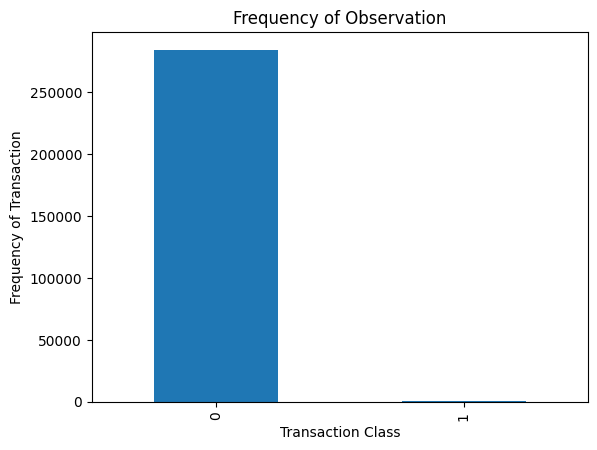

In [ ]:
# Display transaction classes using bar chart
LABEL = ['Normal','Fraud']
classes = df.value_counts(df['Class'], sort=True)
plt.xticks(range(2), LABEL)
classes.plot(kind = 'bar')
plt.title('Frequency of Observation')
plt.xlabel('Transaction Class')
plt.ylabel('Frequency of Transaction')

In [ ]:
# Using describe function to explore our dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Display the Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Data Preprocessing

In [ ]:
# Applying Standard scaling to Time and Amount column
df['Time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
# Appying the describe function on dataset after scaling Time and Amount columns
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,-3.065637e-16,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,2.913952e-17,0.001727
std,1.000002e+00,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,1.000002e+00,0.041527
min,-1.996583e+00,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-3.532294e-01,0.000000
25%,-8.552120e-01,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-3.308401e-01,0.000000
50%,-2.131453e-01,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,-2.652715e-01,0.000000
75%,9.372174e-01,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,-4.471707e-02,0.000000
max,1.642058e+00,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.023622e+02,1.000000


In [ ]:
# Drop the Class and Time columns
X = df.drop(['Class','Time'], axis=1)
y = df['Class']

In [ ]:
# Train Test Split of Datataset
X_train,y_train,X_test,y_test = X[:189871],y[:189871],X[189871:],y[189871:]

In [ ]:
# Value count for X_train
df[:189871]['Class'].value_counts()

0    189501
1       370
Name: Class, dtype: int64

In [ ]:
# Value count for X_test
df[189871:]['Class'].value_counts()

0    94814
1      122
Name: Class, dtype: int64

# Model Definition, Training and Evaluation

In [ ]:
# Definition of training parameters
batch_size = 512
learn_rate = 0.001
epochs = 10
metrics = 'accuracy'
kf = KFold(n_splits = 10)

In [ ]:
# Evaluation Functions
# Display Confusion Matrix
def displayMatrix(y_test,y_pred):
  conf_mat = confusion_matrix(y_test,y_pred)
  ConfusionMatrixDisplay(conf_mat,display_labels = ['Normal', 'Fraud']).plot()

# Calculate Metrics
def calculateMetrics(y_test, y_pred):
  precision = precision_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  return {"Precision": precision, "Recall": recall, "F1_score": f1, "Accuracy": accuracy}

In [ ]:
# Model definition using Adamax Optimizer

input_layer = tf.keras.layers.Input(shape=(X.shape[1]),)

encoder = tf.keras.layers.Dense(256, activation='relu')(input_layer)
encoder = tf.keras.layers.Dense(128, activation='relu')(encoder)
encoder = tf.keras.layers.Dense(32, activation='relu')(encoder)

encoded = tf.keras.layers.Dense(22, activation='sigmoid')(encoder)

decoder = tf.keras.layers.Dense(32, activation='relu')(encoded)
decoder = tf.keras.layers.Dense(128, activation='relu')(decoder)
decoded = tf.keras.layers.Dense(256, activation='relu')(decoder)

output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(decoded)

autoencoder = tf.keras.models.Model(input_layer, output_layer)
opt = tf.keras.optimizers.Adamax(learning_rate=learn_rate)
autoencoder.compile(optimizer=opt, loss='mean_squared_error',metrics=metrics)

In [ ]:
# Training model using K-Fold cross-validation value of 10

for i in kf.split(X_train,y_train):
  autoencoder.fit(X_train,y_train,batch_size=batch_size, epochs=epochs)
  print("Training Completed")

Epoch 1/10
371/371 [==============================] - 5s 10ms/step - loss: 0.0042 - accuracy: 0.9981
Epoch 2/10
371/371 [==============================] - 5s 14ms/step - loss: 9.4414e-04 - accuracy: 0.9989
Epoch 3/10
371/371 [==============================] - 4s 10ms/step - loss: 6.3555e-04 - accuracy: 0.9993
Epoch 4/10
371/371 [==============================] - 4s 10ms/step - loss: 6.0592e-04 - accuracy: 0.9993
Epoch 5/10
371/371 [==============================] - 4s 10ms/step - loss: 5.7661e-04 - accuracy: 0.9993
Epoch 6/10
371/371 [==============================] - 5s 13ms/step - loss: 5.4679e-04 - accuracy: 0.9994
Epoch 7/10
371/371 [==============================] - 4s 10ms/step - loss: 5.2361e-04 - accuracy: 0.9994
Epoch 8/10
371/371 [==============================] - 4s 10ms/step - loss: 4.9698e-04 - accuracy: 0.9995
Epoch 9/10
371/371 [==============================] - 5s 13ms/step - loss: 4.9025e-04 - accuracy: 0.9994
Epoch 10/10
371/371 [==============================] - 4s 1

2967/2967 [==============================] - 4s 1ms/step


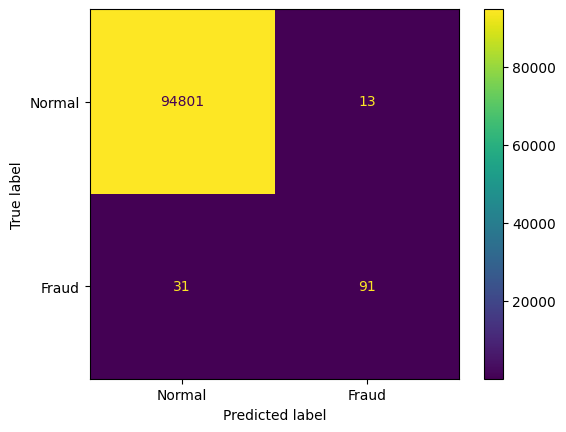

In [ ]:
#Evaluation model for Adamax optimizer
y_pred = autoencoder.predict(X_test)
y_pred = np.round(y_pred).astype(int)
displayMatrix(y_test,y_pred)

In [ ]:
calculateMetrics(y_test, y_pred)

{'Precision': 0.9368421052631579,
 'Recall': 0.7295081967213115,
 'F1_score': 0.8202764976958525,
 'Accuracy': 0.9995891969326705}

In [ ]:
# Model definition using Adam Optimizer

input_layer = tf.keras.layers.Input(shape=(X.shape[1]),)

encoder = tf.keras.layers.Dense(256, activation='relu')(input_layer)
encoder = tf.keras.layers.Dense(128, activation='relu')(encoder)
encoder = tf.keras.layers.Dense(32, activation='relu')(encoder)

encoded = tf.keras.layers.Dense(22, activation='sigmoid')(encoder)

decoder = tf.keras.layers.Dense(32, activation='relu')(encoded)
decoder = tf.keras.layers.Dense(128, activation='relu')(decoder)
decoded = tf.keras.layers.Dense(256, activation='relu')(decoder)

output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(decoded)

autoencoder1 = tf.keras.models.Model(input_layer, output_layer)
opt = tf.keras.optimizers.Adam(learning_rate=learn_rate)
autoencoder1.compile(optimizer=opt, loss='mean_squared_error',metrics=metrics)

In [ ]:
# Training model using K-Fold cross-validation value of 10

for i in kf.split(X_train,y_train):
  autoencoder1.fit(X_train,y_train,batch_size=batch_size, epochs=epochs)
  print("Training Completed")

Epoch 1/10
371/371 [==============================] - 5s 10ms/step - loss: 0.0045 - accuracy: 0.9981
Epoch 2/10
371/371 [==============================] - 4s 11ms/step - loss: 0.0012 - accuracy: 0.9988
Epoch 3/10
371/371 [==============================] - 5s 13ms/step - loss: 6.4768e-04 - accuracy: 0.9993
Epoch 4/10
371/371 [==============================] - 4s 10ms/step - loss: 6.5276e-04 - accuracy: 0.9993
Epoch 5/10
371/371 [==============================] - 4s 10ms/step - loss: 6.5191e-04 - accuracy: 0.9993
Epoch 6/10
371/371 [==============================] - 5s 13ms/step - loss: 8.2561e-04 - accuracy: 0.9991
Epoch 7/10
371/371 [==============================] - 4s 10ms/step - loss: 6.5847e-04 - accuracy: 0.9993
Epoch 8/10
371/371 [==============================] - 3s 9ms/step - loss: 6.4595e-04 - accuracy: 0.9993
Epoch 9/10
371/371 [==============================] - 4s 10ms/step - loss: 6.4240e-04 - accuracy: 0.9993
Epoch 10/10
371/371 [==============================] - 5s 14ms/s

2967/2967 [==============================] - 6s 2ms/step


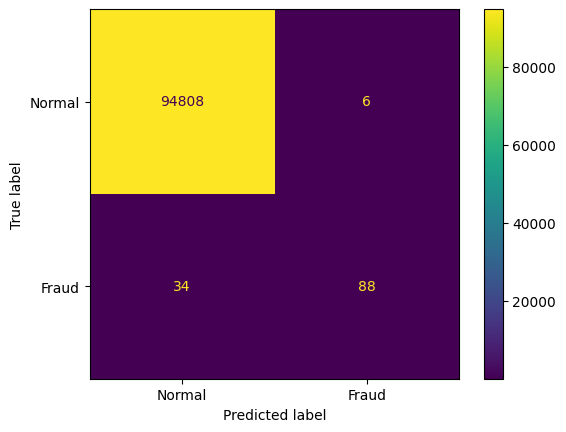

In [ ]:
#Evaluation model for Adam optimizer
y_pred = autoencoder1.predict(X_test)
y_pred = np.round(y_pred).astype(int)
displayMatrix(y_test,y_pred)

In [ ]:
calculateMetrics(y_test, y_pred)

{'Precision': 0.9375,
 'Recall': 0.7377049180327869,
 'F1_score': 0.8256880733944955,
 'Accuracy': 0.9995997303446532}

In [ ]:
# Model definition using RMSprop Optimizer

input_layer = tf.keras.layers.Input(shape=(X.shape[1]),)

encoder = tf.keras.layers.Dense(256, activation='relu')(input_layer)
encoder = tf.keras.layers.Dense(128, activation='relu')(encoder)
encoder = tf.keras.layers.Dense(32, activation='relu')(encoder)

encoded = tf.keras.layers.Dense(22, activation='sigmoid')(encoder)

decoder = tf.keras.layers.Dense(32, activation='relu')(encoded)
decoder = tf.keras.layers.Dense(128, activation='relu')(decoder)
decoded = tf.keras.layers.Dense(256, activation='relu')(decoder)

output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(decoded)

autoencoder2 = tf.keras.models.Model(input_layer, output_layer)
opt = tf.keras.optimizers.RMSprop(learning_rate=learn_rate)
autoencoder2.compile(optimizer=opt, loss='mean_squared_error', metrics=metrics)

In [ ]:
# Training model using K-Fold cross-validation value of 10

for i in kf.split(X_train,y_train):
  autoencoder2.fit(X_train,y_train,batch_size=batch_size, epochs=epochs)
  print("Training Completed")

Epoch 1/10
371/371 [==============================] - 5s 12ms/step - loss: 0.0047 - accuracy: 0.9954
Epoch 2/10
371/371 [==============================] - 4s 12ms/step - loss: 9.6921e-04 - accuracy: 0.9987
Epoch 3/10
371/371 [==============================] - 3s 9ms/step - loss: 7.0178e-04 - accuracy: 0.9993
Epoch 4/10
371/371 [==============================] - 3s 9ms/step - loss: 6.5124e-04 - accuracy: 0.9993
Epoch 5/10
371/371 [==============================] - 5s 15ms/step - loss: 6.2747e-04 - accuracy: 0.9993
Epoch 6/10
371/371 [==============================] - 3s 9ms/step - loss: 6.1339e-04 - accuracy: 0.9993
Epoch 7/10
371/371 [==============================] - 3s 9ms/step - loss: 5.9991e-04 - accuracy: 0.9993
Epoch 8/10
371/371 [==============================] - 4s 10ms/step - loss: 5.8798e-04 - accuracy: 0.9994
Epoch 9/10
371/371 [==============================] - 5s 14ms/step - loss: 5.7069e-04 - accuracy: 0.9994
Epoch 10/10
371/371 [==============================] - 4s 11ms/

2967/2967 [==============================] - 4s 1ms/step


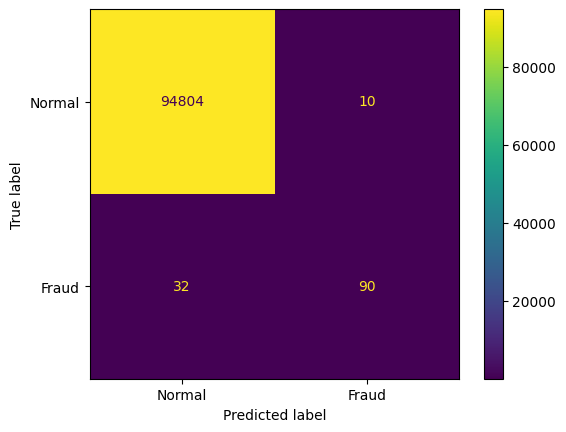

In [ ]:
#Evaluation model for RMSprop optimizer
y_pred = autoencoder2.predict(X_test)
y_pred = np.round(y_pred).astype(int)
displayMatrix(y_test,y_pred)

In [ ]:
calculateMetrics(y_test, y_pred)

{'Precision': 0.9,
 'Recall': 0.7377049180327869,
 'F1_score': 0.8108108108108109,
 'Accuracy': 0.999557596696722}